# Моделирование перекрестка

Эта рабочая тетрадь позволит пошагово выполнить моделирование транспортных потоков и анализ эффекта от ввода выделенных полос

## 1 Моделирование

### 1.1 Введение

[SUMO](https://eclipse.dev/sumo/) - это открытое ПО для транспортного микро-моделирования. Моделирование выполняется на уровне отдельных объектов (транспортных средств, пешеходов).

В рамках данного исследования выполнялось моделирование перекрестка улиц Героев Севастополя и Брестской (далее - Перекресток) и части улицы Героев Севастополя за перекрестком, имеющей участок с уменьшением полосности (по направлению в сторону исторической центральной части города).

Целью исследования является проверка гипотезы о том, что уменьшение количества полос на ул. Героев Севастополя (по направлению вниз от Перекрестка) повысит пропускную способность Перекрестка даже при условии уменьшения количества полос на перекрестке.

Предметом исследования является пропускная способность перекрестка при различных вариантах организации движения на перекрестке и за перекрестком (ниже по ходу улицы Героев Севастополя).

### 1.2 Формулировка гипотезы

![Схема](./traffic_scheme.png)

По данным сервиса Яндекс.Карты (пробки и дорожная ситуация) во время утреннего часа-пик скорость движения по улице Героев Севастополя на участке №1 от Перекрестка до места слияния двух полос движения в одну (обозначено крестиком) - низкая (обозначено красным цветом), на следующем участке №2 длиной примерно 400 м скорость движения средняя (обозначено желтым цветом), после этого участка движение свободное (обозначено зеленым цветом, участок №3). При этом физические условия движения (наличие поворотов, ширина полос, качество дорожного покрытия) примерно одинаковы на всех трёх участках. Из заданных условий следует предположение, что скорость на участке №2 зависит не от физических условий движения, а от скорости на предыдущем участке №1 (то есть на участке №2 происходит разгон после снижения скорости на участке №1).

Одновременно с этим известно, что практическая пропускная способность полосы движения зависит от скорости потока и достигается на скоростях 40-50 км/ч. Но при условии движения транспорта по двум полосам на участке №1, в конце этого участка скорость снижается до значений менее 20 км/ч по причине необходимости перестроения в одну полосу. Таким образом, несмотря на теоретическую пропускную способность участка №1 в 1500 авт./час (теоретическая пропускная способность одной полосы движения - 1500 авт./час), она ограничена пропускной способностью участка №2 с меньшим количеством полос. Теоретическая пропускная способность участка №2 равна 1500 авт./час, но из-за скорости ниже оптимальной в начале участка практическая пропускная способность заметно меньше 1500 авт./час. Можно сделать предположение, что если движение по участку №1 будет осуществляться по одной полосе, то скорость на этом участке и в начале участка №2 вырастет, что приведет к увеличению пропускной способности участков №1 и №2.

С другой стороны, в существующем положении движение на Перекрестке организовано таким образом, что движение в прямом направлении по ул. Героев Севастополя (по направлению в сторону исторического центра города) допускается по двум полосам, аналогично при повороте с ул. Брестской на ул. Героев Севастополя, движение налево допускается по двум полосам. С учетом программы светофорного регулирования Перекрестка, пропускная способность Перекрестка по отдельному направлению может быть расчитана по формуле:

$$ N = n * 1800 * (t_{разреш} - 2) / T_{цикла}\,\text{, где} \\\\ t_{разреш} \,-\, \text{длительность сигнала светофора, разрешающего движение в этом направлении,} \\\\ T_{цикла} \,-\, \text{длительность светофорного цикла,} \\\\ n \,-\, \text{количество полос на перекрестке в этом направлении}$$

В соответствии с фактическим режимом работы светофорного объекта на Перекрестке:

$$ T_{цикла} = 67 \\\\ t_{разреш}^{ГС} = 35 \\\\ t_{разреш}^{Б} = 23 $$

Пропускная способность Перекрестка вниз по ул. Героев Севастополя (в прямом направлении):

$$ N_{ГС} = 2 * 1800 * (35 - 2) / 67 \approx 1773\,\text{авт./час} $$

Пропускная способность Перекрестка по ул. Брестская (левоповоротное направление):

$$ N_{Б} = 2 * 1800 * (23 - 2) / 67 \approx 1128\,\text{авт./час} $$

Общая теоретическая пропускная способность Перекрестка в направлении участка №1, расположенного за перекрестком составляет:

$$ N_2 = N_{ГС} + N_{Б} = 1773 + 1128 = 2901\,\text{авт./час} $$

Аналогично можно рассчитать пропускную способность Перекрестка при условии, что движение с обоих направлений будет осуществляться по одной полосе:

$$ N_1 =  887 + 564 = 1451\,\text{авт./час} $$

Таким образом, теоретическая пропускная способность Перекрестка значительно превышает теоретическую пропускную способность участка улицы, расположенного за Перекрестком, и практически не достижима, в свою очередь теоретическая пропускная способность Перекрестка при движении по одной полосе вместо двух приближается к теоретической пропускной способностью этого участка улицы.

Основная гипотеза формулируется следующим образом: Уменьшение количества полос на участке №1 до одной полосы повысит пропускную способность участка улицы за Перекрестком, что в свою очередь повысит пропускную способность Перекрестка, а уменьшение количества полос на перекрестке не снизит пропускную способность Перекрестка значительно ниже пропускной способности улицы за Перекрестком.

### 1.3 Входные данные для модели

В простейшем виде модель SUMO состоит из модели транспортной сети и определения параметров транспортных потоков (или списка отдельных поездок).

Для данной модели построена упрощенная модель УДС, включающая фрагмент улицы Героев Севастополя и улицы Брестской, а также перекресток со светофорным регулированием на их пересечении. Интенсивности транспортных потоков для каждого направления назначены на уровне 1500 авт./час (заведомо выше практической пропускной способности).

### 1.4 Выходные данные моделирования

Выходные данные моделирования представляют собой список смоделированных поездок каждого транспортного средства (от добавления на УДС в начале маршрута, до удаления из неё в конце).

Для анализа в рамках этого исследования используется принадлежность ТС к транспортному потоку по соответствующему направлению на перекрестке для подсчета фактической интенсивности.


In [1]:
# подключение программных библиотек
import sys
sys.path.append("../common")

from utils import run_process, get_stats

# базовое число для генератора случайных чисел, фиксируется между запусками для обеспечения
# воспроизводимости начальных условий в обоих моделях
seed = str(6235422)  # str(random.randint(1, 9999999))

#### Моделирование транспортных потоков в существующем положении (с двумя полосами движения)

На этом шаге откроется окно программы моделирования SUMO. Запуск модели и завершение работы произойдет автоматически.

In [2]:
_, _ = run_process(['sumo-gui', '-c', 'current/config.sumocfg', '--start', '--quit-on-end', '--seed', seed])

#### Моделирование транспортных потоков в предложенном положении (с одной полосой движения)

In [3]:
_, _ = run_process(['sumo-gui', '-c', 'proposed/config.sumocfg', '--start', '--quit-on-end', '--seed', seed])

In [2]:
df_current_model = get_stats('current/tripinfo-output.xml')
df_proposed_model = get_stats('proposed/tripinfo-output.xml')

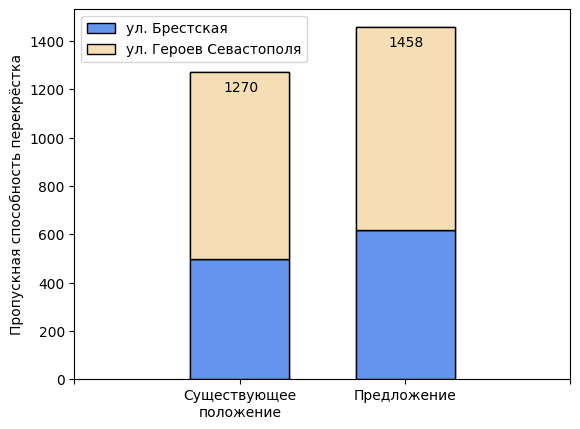

In [3]:
from plot_results import plot_results

results = {
    'current': [
        {
            'flow_0': {
                'count': len(df_current_model[df_current_model['flow'] == 'flow_0'].index)
            },
            'flow_1': {
                'count': len(df_current_model[df_current_model['flow'] == 'flow_1'].index)
            }
        }
    ],
    'proposed': [
        {
            'flow_0': {
                'count': len(df_proposed_model[df_proposed_model['flow'] == 'flow_0'].index)
            },
            'flow_1': {
                'count': len(df_proposed_model[df_proposed_model['flow'] == 'flow_1'].index)
            }
        }
    ]
}

plot_results(results, 1)